In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def piecewise_fun(x):
    #m = .087
    #b = 1048 #intercept for below example 3245.741*(x+150)**(-.1758)
    #return np.piecewise(x,[x<=2000, x>2000],[lambda x: 3245.741*(x+150)**(-.1758), lambda x: -m*x+b])  
    m=.14 # 8 deg slope routing algorithum can work with this
    b = 1280 # intercept for 45 -> 8 deg slope 
    return np.piecewise(x,[x<=2000, x>2000],[lambda x: -x+3000, lambda x: -m*x+b]) # 45 deg to 5 deg slope


# raster should have a 10 m cell size
x = np.arange(0,10000, 10) # x distance 

##########fonnbu slope with a 5 deg linear slope added to the runout zone. 
fonnbu_power = piecewise_fun(x)
raster = np.tile(fonnbu_power ,(900,1)) # turns the 2 d slope into a 3d slope with 900 x 10 meters
print fonnbu_power[199],fonnbu_power[200], fonnbu_power[201], fonnbu_power[400], fonnbu_power[500]

plt.plot(x,fonnbu_power)
plt.show


1010 1000 998 720 579


<function matplotlib.pyplot.show>

In [2]:
header = """ncols 1000 
nrows 900 
xllcorner 0.000000 
yllcorner 0.000000 
cellsize 10.000000  
NODATA_value -9999.000000 """
np.savetxt("Fonnbu_dhm.asc", raster, header=header, comments='')

In [3]:
# now lets make release area! 

release = np.zeros((900,500))

#for x in range(150, 151,1):
#    for y in range(2, 3, 1):
#        release[x,y] = 1
        
for x in range(450, 451,1):
    for y in range(2, 3, 1):
        release[x,y] = 1
        
#for x in range(750, 751,1):
#    for y in range(2, 3, 1):
#        release[x,y] = 1
        


<function matplotlib.pyplot.show>

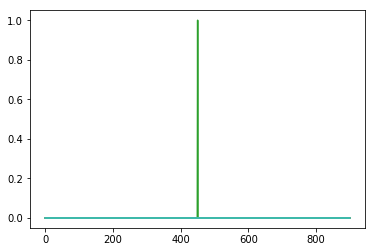

In [4]:
plt.plot(release)
plt.show

In [5]:
np.savetxt("release_one_cell.asc", release, fmt="%d", header=header, comments='')

In [16]:
#----------------------------|
#            a    b    c     |
# x          a    b    c     |
#            a    b    c     |  
#            a    b    c     |   
# x          a    b    c     |    
#            a    b    c     |       
#            a    b    c     |   
# x          a    b    c     |          
#            a    b    c     |
#----------------------------|
infra = np.zeros((900,1000))
infra[:,195:200] = 3 # a
infra[:,295:300] = 2 # b
infra[:,395:400] = 1 # c
print infra[3,400]
np.savetxt("third_deg_infra_321_con.asc", infra, fmt="%d", header=header, comments='')

#----------------------------|
#                            |
# x          a    b    c     |
#                            |  
#                            |   
# x          d    e    f     |    
#                            |       
#                            |   
# x          g    h    i     |          
#                            |
#----------------------------|


infra = np.zeros((900,1000))
infra[140:160,195:200] = 1 # a
infra[140:160,295:300] = 2 # b
infra[140:160,395:400] = 1 # c

infra[440:460,195:200] = 3 # d
infra[440:460,295:300] = 2 # e
infra[440:460,395:400] = 1 # f

infra[740:760,195:200] = 3 # g 
infra[740:760,295:300] = 1 # h
infra[740:760,395:400] = 2 # i

np.savetxt("infra_121_321_312.asc", infra, fmt="%d", header=header, comments='')


0.0
